# **Team 9: Automobile**

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell     #to print multiple output in single cell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [ ]:
data= pd.read_csv('/content/Automobile_data.csv')

### Summary of DataSet

In [ ]:
data.head()
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
data.shape

(205, 26)

*dataset consist of 205 rows and 26 columns*

In [ ]:
data.info()   #summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

*datatypes of some columns are having incorrect datatype*

### Dealing with incorrect datatype

In [ ]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
data.replace("?", np.nan, inplace = True)   #to convert datatype , "?" should be replaced by nan value

In [ ]:
data[['normalized-losses','bore','stroke','horsepower', 'peak-rpm', 'price']]=data[['normalized-losses',
'bore','stroke','horsepower', 'peak-rpm', 'price']].astype('float64')                      #converting incorrect datatypes

### Handling Missing values

In [ ]:
data.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

*so we can see missing values in normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price*

1. num of doors

*filling missing values in numof door by using values with respect to body style*

In [ ]:
data['num-of-doors'] = data['num-of-doors'].fillna(data['body-style'].map({'sedan':'four', 
                                                                        'hatchback':'two', 'convertible': 'two'}))

2. normalized losses

In [ ]:
data['normalized-losses'] = data['normalized-losses'].fillna(data['normalized-losses'].mean())

3. Bore 

In [ ]:
data['bore'] = data['bore'].fillna(data.groupby('make')['bore'].transform('mean'))

4. Stroke

In [ ]:
data['stroke'] = data['stroke'].fillna(data.groupby('make')['stroke'].transform('mean'))

5. Horsepower

In [ ]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())

6. peak rpm

In [ ]:
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].mean())

7. Price

In [ ]:
data['price'] = data['price'].fillna(data['price'].mean())

*Tried median ,but no improvement in accuracy*

*Checking for null values again*

In [ ]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Checking for outliers

*creating a variable with all numerical columns*

In [ ]:
num_var = ['symboling','normalized-losses','wheel-base','length','width','height'
,'curb-weight','engine-size','bore','stroke','compression-ratio'
,'horsepower','peak-rpm','city-mpg','highway-mpg']

*creating 2 variables for easy plotting of box plot for checking outliers*

In [ ]:
var11=data[['normalized-losses','wheel-base','length','width','engine-size']]
var12=data[['compression-ratio','horsepower','city-mpg','highway-mpg']]

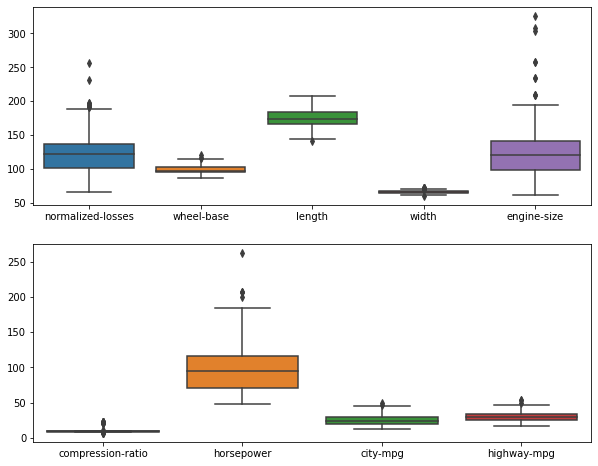

In [ ]:
plt.subplots(figsize = (10,8))
plt.subplot(2,1,1)
sns.boxplot(data=var11)
plt.subplot(2,1,2)
sns.boxplot(data=var12)

plt.show();

*we can see outliers*

In [ ]:
# for i in num_var:                                               #using for loop outliers in the list num_var are removed with the help of np.where fn
#   Q1 = data[i].quantile(0.25)
#   Q3 = data[i].quantile(0.75)
#   IQR = Q3 - Q1
#   data[i] = np.where(data[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),data[i])
#   data[i] = np.where(data[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),data[i])

*Removing outliers doesnot making any impact in model accuracy since dataset is small*

### checking for feature reduction ,feature addition

In [ ]:
# data['engine-location'].value_counts()

In [ ]:
# data['mean_mpg'] = (data['highway-mpg']+data['city-mpg'])/2  

In [ ]:
# data.columns

In [ ]:
# data.drop(['city-mpg','highway-mpg'],axis=1,inplace=True)

*accuracy is not improved since dataset is small*

### mapping values

In [ ]:
data['num-of-doors'] = data['num-of-doors'].map({'two':2,'four': 4}) 

In [ ]:
data['num-of-cylinders'] = data['num-of-cylinders'].map({'two':2, 'three':3, 'four': 4, 'five':5, 'six':6, 'eight':8, 'twelve':12}) 

*changing text values to numerical beacause it will reduce column numbers after encoding*

## **Exploratory Data Analysis**

summary statistics of data

In [ ]:
data.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.328916,3.256278,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270909,0.313656,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1. 50% of vehicle have a risk rating of 1
2. have a an average mileage of 25 to 30

Correlation

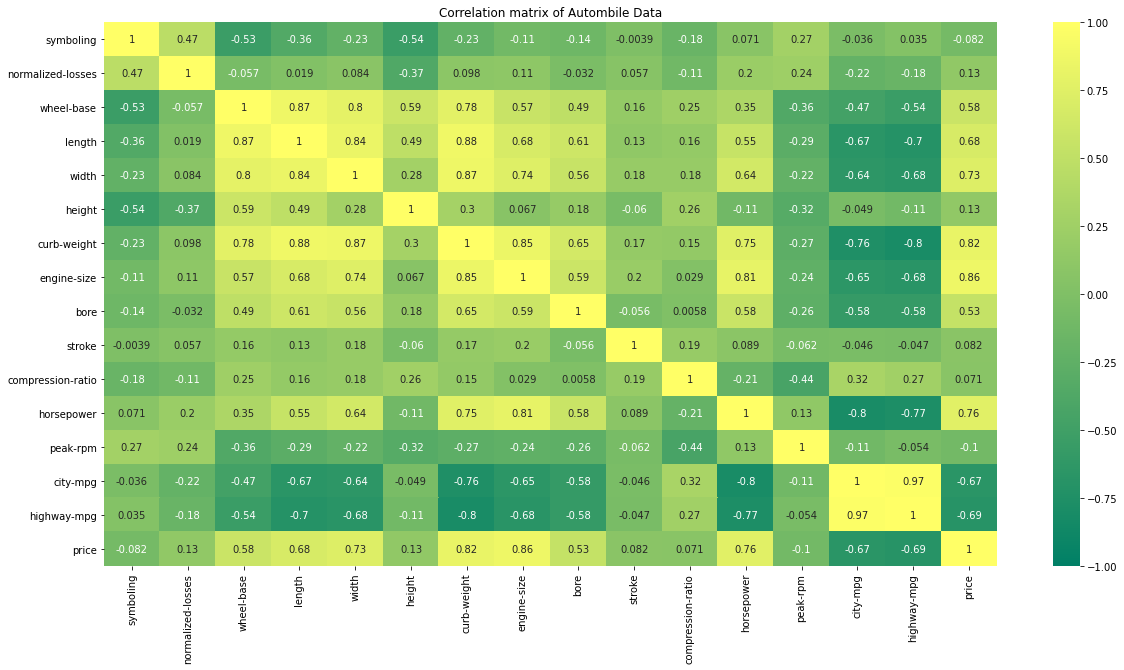

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),vmin=-1, vmax=1,annot=True,cmap='summer');
plt.title("Correlation matrix of Autombile Data");


1. highly positively correlated attributes=horsepower,bore,engine-size,curb-weight,length,width,wheel base
2. city-mpg,highway-mpg are negatively corelated
3.Normalised loss,symboling,stroke,peak rpm have weak correlation with price

Pair Plot

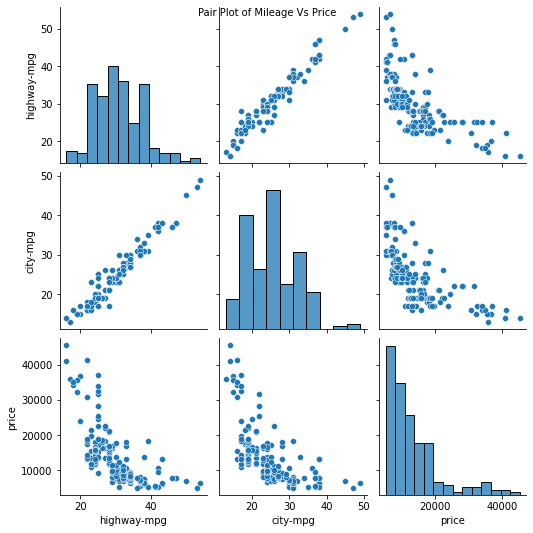

In [ ]:
sns.pairplot(data[['highway-mpg' ,'city-mpg','price']])
plt.suptitle('Pair Plot of Mileage Vs Price', 
             size = 10);


*Vehicle with high price have low mileage.High priced are meant for high performance and running cost is not very important in this segment.*

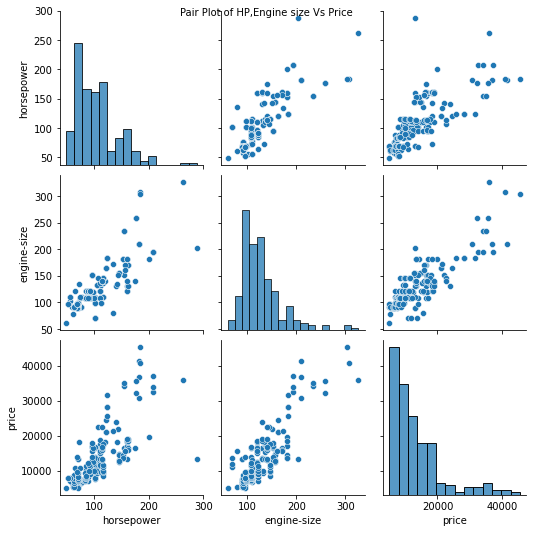

In [ ]:
sns.pairplot(data[['horsepower','engine-size','price']])
plt.suptitle('Pair Plot of HP,Engine size Vs Price',size = 10);


*Horse power increases the price of the vehicle increases.Almost a linear relationship is found.More horse power also means bigger engine size. Price increases with engine size*

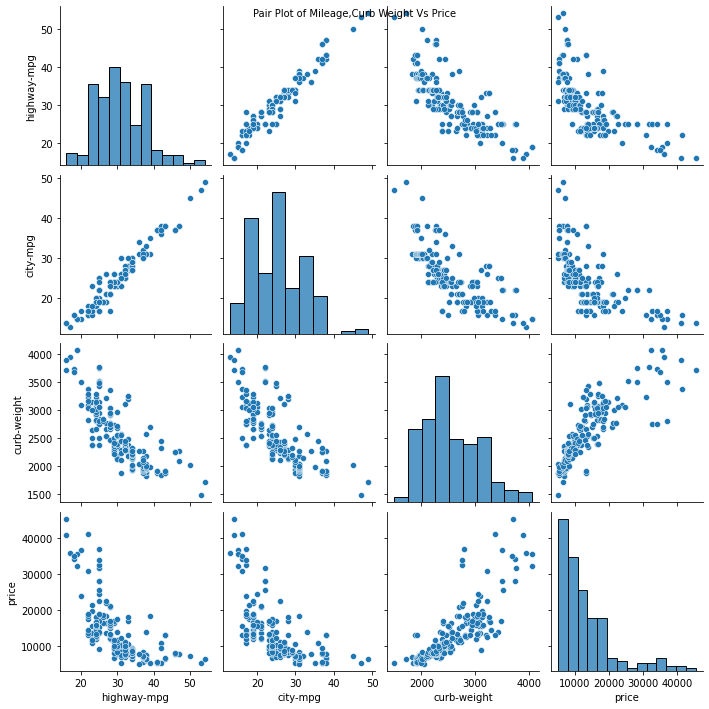

In [ ]:
sns.pairplot(data[['highway-mpg','city-mpg','curb-weight','price']])
plt.suptitle('Pair Plot of Mileage,Curb Weight Vs Price',size = 10);

*High curb weight increases price of the vehicle and decreases the mileage of the vehicle*

Text(0.5, 0.98, 'Pair Plot of Dimensions Vs Price')

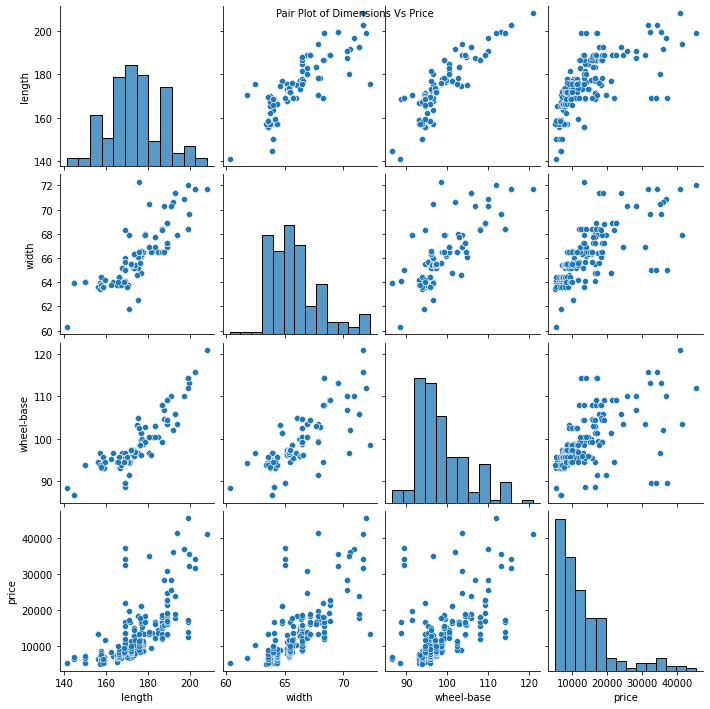

In [ ]:
sns.pairplot(data[['length','width','wheel-base','price']])
plt.suptitle('Pair Plot of Dimensions Vs Price',size = 10);
plt.savefig('our_plot_name.jpg', format='jpeg', dpi=70)     #to save image

*length,width,wheel base have very good correlation with price*

Histogram of most correlated variables

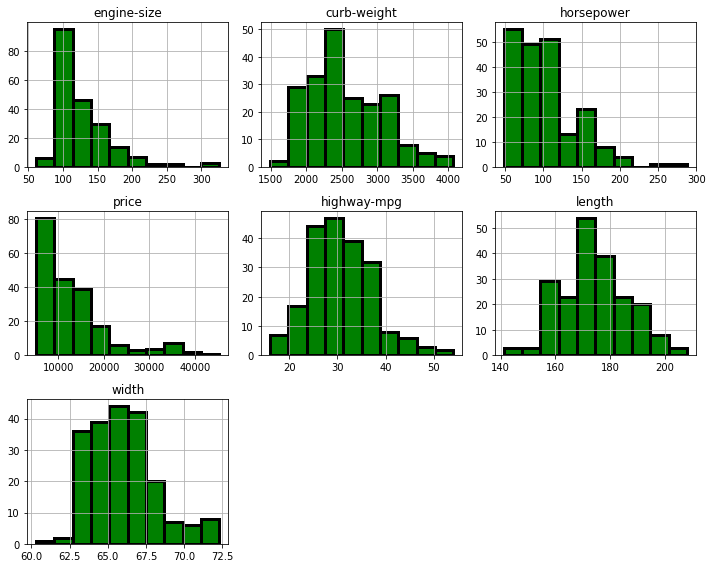

In [ ]:
data[['engine-size','curb-weight','horsepower','price','highway-mpg','length','width']].hist(figsize=(10,8),color='g',linewidth='3',edgecolor='k')
plt.title('Histogram of important features',fontsize=16,loc='center')
plt.tight_layout()
plt.show();

1. In this data set the curb weight of most cars is in the range 2000-3100 lbs
2. The Engine Size is in range 80 to 180
3. Most vehicle has horsepower 50 to 125


Plotting a histogram of target price

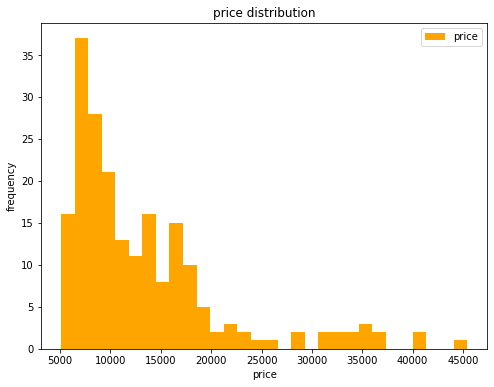

In [ ]:
plt.figure(figsize=(8,6))                                     # creating the figure
plt.hist(data['price'],bins=30,label='price',color='orange')     #bin= defyning number of bars,
plt.xlabel('price')
plt.ylabel('frequency')
plt.legend()
plt.title('price distribution');

1. Most Vehicle are in price range 5000 to 20000
2. Price does not have a normal distribution

Plot of Different models of car

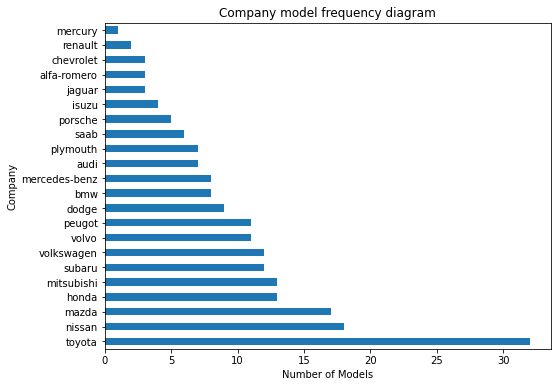

In [ ]:
plt.figure(figsize=(8,6))
data['make'].value_counts().plot(kind='barh')
plt.xlabel('Number of Models')
plt.ylabel('Company')
plt.title("Company model frequency diagram");

*The top 3 vehicle companies are Toyota followed by mazda and Nissan. Then comes Honda,mitsubishi ,subaru and Volvo.*

Box plot for price variance of each make

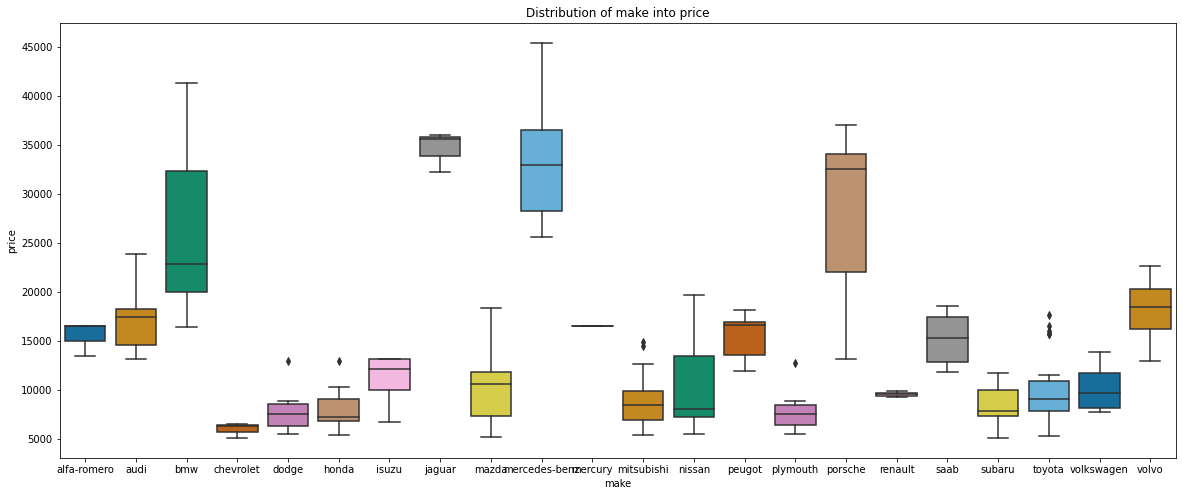

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='make',y='price',data=data, 
                 palette="colorblind")
plt.title('Distribution of make into price');

*Clearly the makers mercedes-benz, porsche, jaguar and bmw have the high prices*

## **Encoding**

*using one hot encoding to convert categorical variables*

In [ ]:
# data=pd.get_dummies(data)

*using Label Encoding to convert categorical variables*

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

*creating a variable containing object datatypes*

In [ ]:
objList = data.select_dtypes(include = "object").columns
print (objList)           

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')


In [ ]:
obj=data[['aspiration','make','fuel-type','body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system']]

In [ ]:
obj.head()
obj.tail()

,aspiration,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,std,alfa-romero,gas,convertible,rwd,front,dohc,mpfi
1,std,alfa-romero,gas,convertible,rwd,front,dohc,mpfi
2,std,alfa-romero,gas,hatchback,rwd,front,ohcv,mpfi
3,std,audi,gas,sedan,fwd,front,ohc,mpfi
4,std,audi,gas,sedan,4wd,front,ohc,mpfi


,aspiration,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,fuel-system
200,std,volvo,gas,sedan,rwd,front,ohc,mpfi
201,turbo,volvo,gas,sedan,rwd,front,ohc,mpfi
202,std,volvo,gas,sedan,rwd,front,ohcv,mpfi
203,turbo,volvo,diesel,sedan,rwd,front,ohc,idi
204,turbo,volvo,gas,sedan,rwd,front,ohc,mpfi


*using for loop to label encode all object types*

In [ ]:
for feat in objList:
    data[feat] = label_encoder.fit_transform(data[feat].astype(str))

In [ ]:
obj.head()

,aspiration,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,0,0,1,0,2,0,0,5
1,0,0,1,0,2,0,0,5
2,0,0,1,2,2,0,5,5
3,0,1,1,3,1,0,3,5
4,0,1,1,3,0,0,3,5


*checking for the change in data by using head() function*

In [ ]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


*we can see encoded data*

# **Binning**

Binning is done to the target variable **price** to improve accuracy 

In [ ]:
binwidth= int((max(data['price'])- min(data['price']))/3)
bins= range(int(min(data['price'])),int(max(data['price'])),binwidth)
data['binned-Price']= pd.cut(data['price'],bins,labels=["Low","Medium","High"])

In [ ]:
data.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,binned-Price
0,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000,Low
1,3,122.0,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000,Low
2,1,122.0,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000,Low
3,2,164.0,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000000,Low
4,2,164.0,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000,Low
5,2,122.0,1,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000,Low
6,1,158.0,1,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000000,Low
7,1,122.0,1,1,0,0,4,1,0,105.8,192.7,71.4,55.7,2954,3,1,136,5,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000000,Medium
8,1,158.0,1,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,5,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000,Medium
9,0,122.0,1,1,1,1,2,0,0,99.5,178.2,67.9,52.0,3053,3,1,131,5,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353,Low


In [ ]:
price=data['price']

In [ ]:
binned= data['binned-Price']
df= pd.DataFrame({"price":price, "binned_price":binned})

In [ ]:
df.head(30)

,price,binned_price
0,13495.000000,Low
1,16500.000000,Low
2,16500.000000,Low
3,13950.000000,Low
4,17450.000000,Low
5,15250.000000,Low
6,17710.000000,Low
7,18920.000000,Medium
8,23875.000000,Medium
9,13207.129353,Low


In [ ]:
data.loc[ 10:18, ['price','binned-Price']]

,price,binned-Price
10,16430.0,Low
11,16925.0,Low
12,20970.0,Medium
13,21105.0,Medium
14,24565.0,Medium
15,30760.0,Medium
16,41315.0,High
17,36880.0,High
18,5151.0,Low


In [ ]:
# pd.crosstab(data['price'],data['binned-Price'])

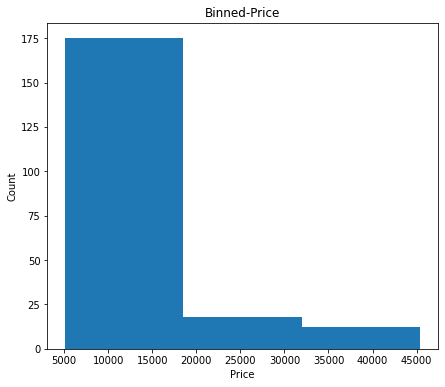

In [ ]:
plt.figure(figsize=(7,6))
plt.hist(data["price"],bins=3)
plt.title("Binned-Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show();

*checking if there is any null values in new column*

In [ ]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
binned-Price         2
dtype: int64

*dropping null values in binned price*

In [ ]:
#can use mode

In [ ]:
data.dropna(subset =['binned-Price'], axis = 0, inplace =True)
data.reset_index(drop = True, inplace =True)

In [ ]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
binned-Price         0
dtype: int64

## **Modeling**

### Splitting dataset

In [ ]:
x= data.drop(['price','binned-Price'],axis=1)    
y= data['binned-Price']

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=42,test_size=0.3)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticR= LogisticRegression()

In [ ]:
LogisticR.fit(x_train,y_train)
L_pred= LogisticR.predict(x_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracy_score(y_test,L_pred)

0.9180327868852459

In [ ]:
y_test.value_counts()

Low       51
Medium     6
High       4
Name: binned-Price, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,L_pred)

array([[ 4,  0,  0],
       [ 1, 50,  0],
       [ 1,  3,  2]])

In [ ]:
print(classification_report(y_test, L_pred))

              precision    recall  f1-score   support

        High       0.67      1.00      0.80         4
         Low       0.94      0.98      0.96        51
      Medium       1.00      0.33      0.50         6

    accuracy                           0.92        61
   macro avg       0.87      0.77      0.75        61
weighted avg       0.93      0.92      0.91        61



RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rclass=RandomForestClassifier(n_estimators=100,random_state=42)
Rclass.fit(x_train,y_train)
Rpred=Rclass.predict(x_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
accuracy_score(y_test,Rpred)

0.9508196721311475

In [ ]:
y_test.value_counts()

Low       51
Medium     6
High       4
Name: binned-Price, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Rpred)

array([[ 4,  0,  0],
       [ 1, 50,  0],
       [ 1,  1,  4]])

In [ ]:
print(classification_report(y_test, Rpred))

              precision    recall  f1-score   support

        High       0.67      1.00      0.80         4
         Low       0.98      0.98      0.98        51
      Medium       1.00      0.67      0.80         6

    accuracy                           0.95        61
   macro avg       0.88      0.88      0.86        61
weighted avg       0.96      0.95      0.95        61



DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionC= DecisionTreeClassifier()
DecisionC.fit(x_train,y_train)
D_pred= DecisionC.predict(x_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
accuracy_score(y_test,D_pred)

0.9344262295081968

In [ ]:
print(classification_report(y_test, D_pred))

              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       0.98      0.96      0.97        51
      Medium       0.62      0.83      0.71         6

    accuracy                           0.93        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.95      0.93      0.94        61



GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
Gaussian = GaussianNB()
Gaussian.fit(x_train,y_train)
G_pred = Gaussian.predict(x_test)
G_pred

GaussianNB(priors=None, var_smoothing=1e-09)

array(['High', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'High',
       'Medium', 'Low', 'Medium', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Medium', 'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Medium', 'Low',
       'Medium', 'Low', 'High'], dtype='<U6')

In [ ]:
accuracy_score(y_test,G_pred)

0.7868852459016393

In [ ]:
print(classification_report(y_test, G_pred))

              precision    recall  f1-score   support

        High       0.67      1.00      0.80         4
         Low       0.98      0.78      0.87        51
      Medium       0.29      0.67      0.40         6

    accuracy                           0.79        61
   macro avg       0.64      0.82      0.69        61
weighted avg       0.89      0.79      0.82        61



BernoulliNB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
Bernoulli=BernoulliNB()
Bernoulli.fit(x_train,y_train)
B_pred = Bernoulli.predict(x_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
accuracy_score(y_test,B_pred)

0.8360655737704918

In [ ]:
print(classification_report(y_test, B_pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       0.84      1.00      0.91        51
      Medium       0.00      0.00      0.00         6

    accuracy                           0.84        61
   macro avg       0.28      0.33      0.30        61
weighted avg       0.70      0.84      0.76        61



XGBClassifier

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
XGB_pred=xgb.predict(x_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
accuracy_score(y_test, XGB_pred)

0.9180327868852459

checking for feature importance

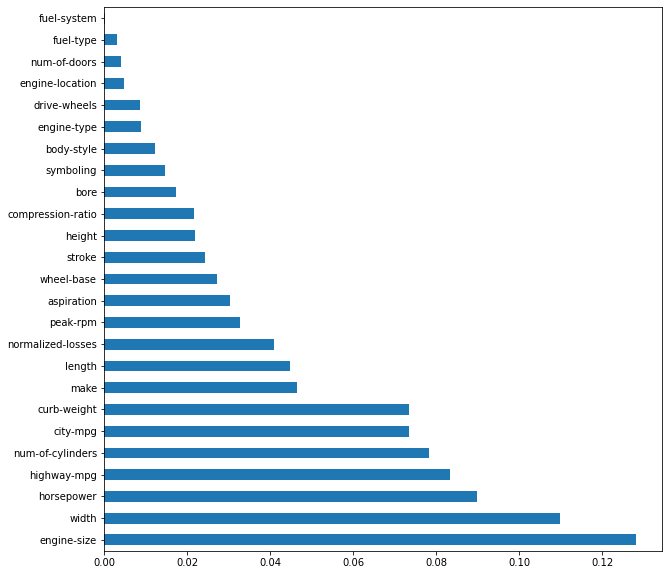

In [ ]:
feat_importances = pd.Series(Rclass.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10));

*can change model to check for feature importance in decision tree,random forest etc*

In [ ]:
pd.Series(Rclass.feature_importances_,index=x.columns).sort_values(ascending=False)*100

engine-size          12.799546
width                10.973279
horsepower            8.972075
highway-mpg           8.333179
num-of-cylinders      7.820569
city-mpg              7.355232
curb-weight           7.332692
make                  4.640680
length                4.467733
normalized-losses     4.090595
peak-rpm              3.268048
aspiration            3.022968
wheel-base            2.727386
stroke                2.420346
height                2.189598
compression-ratio     2.173307
bore                  1.739579
symboling             1.467263
body-style            1.230733
engine-type           0.886542
drive-wheels          0.865259
engine-location       0.488514
num-of-doors          0.410069
fuel-type             0.312507
fuel-system           0.012300
dtype: float64

In [ ]:
pd.Series(xgb.feature_importances_,index=x.columns).sort_values(ascending=False)*100

width                18.556858
length               14.616817
engine-type          14.091333
engine-size          14.043516
aspiration            4.894625
peak-rpm              4.784997
curb-weight           3.705937
horsepower            3.705907
symboling             3.627424
normalized-losses     3.386172
bore                  2.476311
city-mpg              2.324186
make                  2.265446
body-style            2.012968
highway-mpg           1.620275
compression-ratio     1.078497
drive-wheels          1.075086
num-of-cylinders      0.894730
stroke                0.838914
wheel-base            0.000000
engine-location       0.000000
num-of-doors          0.000000
fuel-system           0.000000
fuel-type             0.000000
height                0.000000
dtype: float32

In [ ]:
data.drop(['engine-location'],axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticR= LogisticRegression()
LogisticR.fit(x_train,y_train)
L_pred= LogisticR.predict(x_test)
accuracy_score(y_test,L_pred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.9180327868852459